In [1]:
import cobra
from eflux.eflux2 import add_slack_variables_to_model, get_condition_specific_upper_bounds, get_normalized_condition
from eflux.utils import get_max_flux_bounds
import pandas as pd
import numpy as np

In [2]:
dir(eflux2)

NameError: name 'eflux2' is not defined

# Data

In [3]:
ls ../data/circadian_experiments/processed_data

cleaned_enzyme_activity.csv          normalized_sucrose_metabolomics.csv
enzyme_constrained_fluxes.csv        sucrose_metabolomics.csv*
normalized_enzyme_activity.csv


In [4]:
enzyme_activity = pd.read_csv('../data/circadian_experiments/processed_data/normalized_enzyme_activity.csv', index_col='Reaction_ID')
reference_condition = 'L_T16_B'

# model = cobra.io.load_json_model('../models/syn_elong_flipped_no_zero.json')
# Run Eflux on further reduced model (with biomass cofactor removed)
model = cobra.io.load_json_model('../models/syn_elong_flipped_no_zero_nocofactors.json')

model.reactions.BIOMASS__1.lower_bound = 0.01
model.reactions.EX_sucr_e.lower_bound = 0.0
model.objective = 'EX_sucr_e'
model.optimize()


Set parameter TokenServer to value "leghorn.emsl.pnl.gov"


,fluxes,reduced_costs
O2tcx,0.100947,0.0
DTMPK,0.000285,0.0
BIOMASS__1,0.054004,0.0
3HAD160,0.020871,0.0
RNDR3,0.000355,0.0
...,...,...
VALTA,0.016791,0.0
TYRTA,0.007269,0.0
SUCRt2,0.629200,0.0
3OAR40_1,0.021903,0.0


In [8]:
positive_lb = {rxn.id: rxn.lower_bound for rxn in model.reactions if rxn.lower_bound > 0}
positive_lb

{'BIOMASS__1': 0.01}

# Compute Flux variability analysis to get  upper bounds

In [9]:
fva_upper_bounds = get_max_flux_bounds(model, rxn_list = [])#['EX_sucr_e', 'EX_photon650_e', 'EX_photon690_e', 'EX_co2_e', 'BIOMASS__1'])
fva_upper_bounds

Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmp3mzg400n.lp
Reading time = 0.00 seconds
: 928 rows, 793 columns, 3667 nonzeros
Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmptu2u3s4k.lp
Reading time = 0.00 seconds
: 928 rows, 793 columns, 3667 nonzeros
Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmp85wync9h.lp
Reading time = 0.00 seconds
: 928 rows, 793 columns, 3667 nonzeros
Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmpvbz29rho.lp
Reading time = 0.00 seconds
: 928 rows, 793 columns, 3667 nonzeros
Set parameter TokenServer to value "leghorn.emsl.pnl.gov"
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy

{'O2tcx': 0.100946687,
 'DTMPK': 0.000285305,
 'BIOMASS__1': 0.054004225,
 '3HAD160': 0.020871443,
 'RNDR3': 0.000354753,
 'Htex': 8.17433266,
 'G5SD': 0.025337668,
 'HISTDa': 0.004635209,
 'TRPS3': 0.003859453,
 'U23GAAT2': 0.00051557,
 'HOXGfx': 0.000248098,
 'PGK': 19.543797312,
 'IMPD': 0.005653755,
 'LPOR': 0.000539389,
 'DESAT18a': 0.005269349,
 'FUM': 0.03193853,
 'PHYFXOR': 0.000248098,
 'RNDR1': 0.000285305,
 'GLYCL': 0.05154961,
 'ACONT': 0.063059174,
 'NDPK7': 0.000354753,
 'AIRC2': 0.010200716,
 'IGPS': 0.003859453,
 'DHORD3um': 0.010200716,
 'MTHFC': 0.02503664,
 'HISTDb': 0.004635209,
 'UPPDC1': 0.000787486,
 'GARFT': 0.010200716,
 'H4THDPR': 0.012902867,
 'UDPG4E': 0.002275578,
 'GLCS3': 0.027744437,
 'AICART': 0.014835924,
 'PRAGSr': 0.010200716,
 'GK1': 0.005653755,
 'SHKK': 0.021127606,
 'G1PACT': 0.005799593,
 '3HAD60': 0.021902582,
 'O2tu': 10.924768239,
 'SK_for_c': 0.000539389,
 '3HAD80': 0.021902582,
 '3OAR160': 0.021902582,
 'GALUi': 0.639598048,
 'IGPDH': 0.004

# Compute condition-specific upper bounds

In [10]:
condition_specific_upper_bounds = {condition: get_condition_specific_upper_bounds(fva_upper_bounds, enzyme_activity[condition].dropna().to_dict())
                                   for condition in enzyme_activity}
condition_specific_models = {condition: add_slack_variables_to_model(model, upper_bounds)
                            for condition, upper_bounds in condition_specific_upper_bounds.items()}

condition_specific_fluxes = pd.DataFrame({condition: condition_specific_model.optimize().fluxes
                             for condition, condition_specific_model in condition_specific_models.items()
                            })

Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmpt3np4h2c.lp
Reading time = 0.01 seconds
: 927 rows, 792 columns, 3664 nonzeros
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmp5idn6dsq.lp
Reading time = 0.01 seconds
: 927 rows, 792 columns, 3664 nonzeros
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmpydlwp6f7.lp
Reading time = 0.01 seconds
: 927 rows, 792 columns, 3664 nonzeros
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmppmf8as9f.lp
Reading time = 0.01 seconds
: 927 rows, 792 columns, 3664 nonzeros
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmp5kv7k62q.lp
Reading time = 0.01 seconds
: 927 rows, 792 columns, 3664 nonzeros
Read LP format model from file /var/folders/k9/b8pxky2572sdtgy2vnxhcljw0000gn/T/tmpkp3_z14m.lp
Reading time = 0.01 seconds
: 927 rows, 792 columns, 3664 nonzeros
Read LP format model from fi

<Axes: ylabel='Density'>

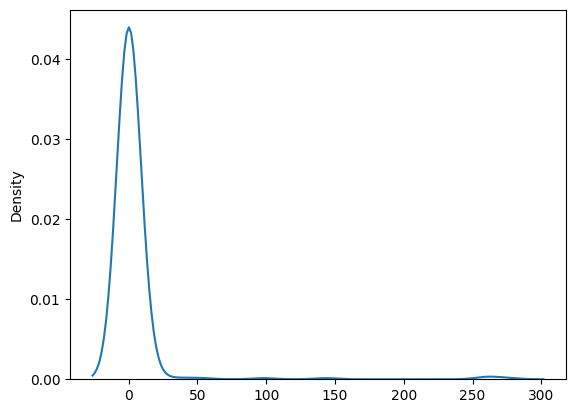

In [11]:
import seaborn as sns
sns.kdeplot(condition_specific_upper_bounds['D_T2_A'])


<Axes: ylabel='Density'>

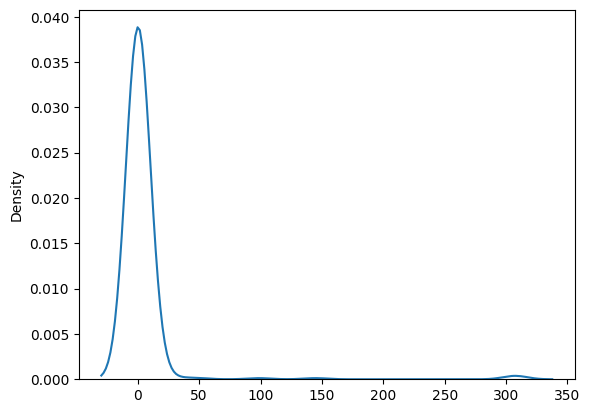

In [12]:
sns.kdeplot(condition_specific_upper_bounds['D_T2_B'])


<Axes: ylabel='Density'>

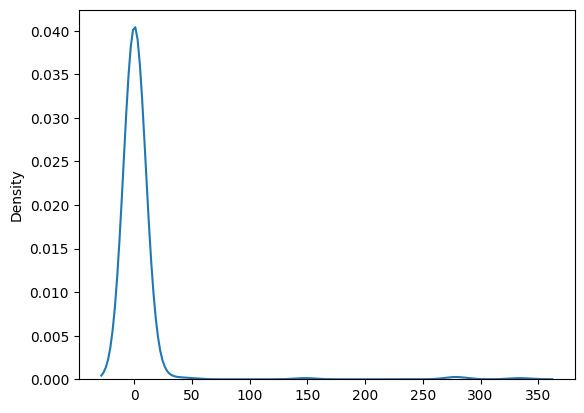

In [13]:
sns.kdeplot(condition_specific_upper_bounds['D_T2_C'])


In [24]:
fluxes = condition_specific_fluxes
# fluxes.to_csv('../data/circadian_experiments/processed_data/enzyme_constrained_fluxes.csv')
fluxes.to_csv('../data/circadian_experiments/processed_data/enzyme_constrained_fluxes_nocofactorsinmodel.csv')

In [15]:
fluxes.iloc[:,15:]

,L_T16_A,L_T16_B,L_T16_C,D_T0_A,D_T0_B,D_T0_C,D_T2_A,D_T2_B,D_T2_C,D_T4_A,D_T4_B,D_T4_C,D_T8_A,D_T8_B,D_T8_C
O2tcx,0.047877,0.100947,0.039764,0.018692,0.018692,0.018692,0.018759,0.018692,0.018692,0.018692,0.018692,0.018692,0.039310,0.031234,0.025733
DTMPK,0.000135,0.000285,0.000112,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000111,0.000088,0.000073
BIOMASS__1,0.025613,0.054004,0.021273,0.010000,0.010000,0.010000,0.010036,0.010000,0.010000,0.010000,0.010000,0.010000,0.021030,0.016709,0.013766
3HAD160,0.009899,0.020871,0.008222,0.003865,0.003865,0.003865,0.003879,0.003865,0.003865,0.003865,0.003865,0.003865,0.008128,0.006458,0.005320
RNDR3,0.000168,0.000355,0.000140,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000138,0.000110,0.000090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALTA,0.007963,0.016791,0.006614,0.003109,0.003109,0.003109,0.003120,0.003109,0.003109,0.003109,0.003109,0.003109,0.006538,0.005195,0.004280
TYRTA,0.003448,0.007269,0.002863,0.001346,0.001346,0.001346,0.001351,0.001346,0.001346,0.001346,0.001346,0.001346,0.002831,0.002249,0.001853
SUCRt2,0.298417,0.629200,0.247849,0.116509,0.116509,0.116509,0.116926,0.116509,0.116509,0.116509,0.116509,0.116509,0.245017,0.194680,0.160391
3OAR40_1,0.010388,0.021903,0.008628,0.004056,0.004056,0.004056,0.004070,0.004056,0.004056,0.004056,0.004056,0.004056,0.008529,0.006777,0.005583


In [18]:
fluxes.iloc[:,15:]

,L_T16_A,L_T16_B,L_T16_C,D_T0_A,D_T0_B,D_T0_C,D_T2_A,D_T2_B,D_T2_C,D_T4_A,D_T4_B,D_T4_C,D_T8_A,D_T8_B,D_T8_C
O2tcx,0.047877,0.100947,0.039764,0.018692,0.018692,0.018692,0.018759,0.018692,0.018692,0.018692,0.018692,0.018692,0.039310,0.031234,0.025733
DTMPK,0.000135,0.000285,0.000112,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000111,0.000088,0.000073
BIOMASS__1,0.025613,0.054004,0.021273,0.010000,0.010000,0.010000,0.010036,0.010000,0.010000,0.010000,0.010000,0.010000,0.021030,0.016709,0.013766
3HAD160,0.009899,0.020871,0.008222,0.003865,0.003865,0.003865,0.003879,0.003865,0.003865,0.003865,0.003865,0.003865,0.008128,0.006458,0.005320
RNDR3,0.000168,0.000355,0.000140,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,0.000138,0.000110,0.000090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALTA,0.007963,0.016791,0.006614,0.003109,0.003109,0.003109,0.003120,0.003109,0.003109,0.003109,0.003109,0.003109,0.006538,0.005195,0.004280
TYRTA,0.003448,0.007269,0.002863,0.001346,0.001346,0.001346,0.001351,0.001346,0.001346,0.001346,0.001346,0.001346,0.002831,0.002249,0.001853
SUCRt2,0.298417,0.629200,0.247849,0.116509,0.116509,0.116509,0.116926,0.116509,0.116509,0.116509,0.116509,0.116509,0.245017,0.194680,0.160391
3OAR40_1,0.010388,0.021903,0.008628,0.004056,0.004056,0.004056,0.004070,0.004056,0.004056,0.004056,0.004056,0.004056,0.008529,0.006777,0.005583


In [19]:
pd.DataFrame.from_dict(condition_specific_upper_bounds)[['D_T2_A', 'D_T2_B', 'D_T2_C']]

,D_T2_A,D_T2_B,D_T2_C
DTMPK,0.000333,0.000268,0.000247
3HAD160,0.026595,0.022606,0.008337
RNDR3,0.000208,0.000183,0.000254
G5SD,0.031970,0.033763,0.030017
HISTDa,0.007351,0.006775,0.006803
...,...,...,...
GLYCLTDx,0.076571,0.076243,0.071954
GHMT2r,0.040687,0.034262,0.042111
ILETA,0.015896,0.013201,0.019500
VALTA,0.017066,0.014172,0.020935


In [20]:
bounds = {r.name: r.dual for r in  condition_specific_models['D_T2_A'].constraints}
variables = {r.name: r.primal for r in condition_specific_models['D_T2_A'].variables if 'SLACK' in r.name}
variables

{'SLACK_DTMPK': 0.0,
 'SLACK_3HAD160': 0.0,
 'SLACK_RNDR3': 0.0,
 'SLACK_G5SD': 0.0,
 'SLACK_HISTDa': 0.0,
 'SLACK_TRPS3': 0.0,
 'SLACK_U23GAAT2': 0.0,
 'SLACK_HOXGfx': 0.0,
 'SLACK_PGK': 0.0,
 'SLACK_IMPD': 0.0,
 'SLACK_LPOR': 0.0,
 'SLACK_DESAT18a': 0.0,
 'SLACK_FUM': 0.0,
 'SLACK_PHYFXOR': 0.0,
 'SLACK_RNDR1': 0.0,
 'SLACK_GLYCL': 0.0,
 'SLACK_ACONT': 0.0,
 'SLACK_NDPK7': 0.0,
 'SLACK_AIRC2': 0.0,
 'SLACK_IGPS': 0.0,
 'SLACK_DHORD3um': 0.0,
 'SLACK_MTHFC': 0.0,
 'SLACK_HISTDb': 0.0,
 'SLACK_UPPDC1': 0.0,
 'SLACK_GARFT': 0.0,
 'SLACK_H4THDPR': 0.0,
 'SLACK_UDPG4E': 0.0,
 'SLACK_GLCS3': 0.0,
 'SLACK_AICART': 0.0,
 'SLACK_PRAGSr': 0.0,
 'SLACK_GK1': 0.0,
 'SLACK_SHKK': 0.0,
 'SLACK_G1PACT': 0.0,
 'SLACK_3HAD60': 0.0,
 'SLACK_3HAD80': 0.0,
 'SLACK_3OAR160': 0.0,
 'SLACK_GALUi': 0.0,
 'SLACK_IGPDH': 0.0,
 'SLACK_OMPDC': 0.0,
 'SLACK_GLUSfx': 0.0,
 'SLACK_GLUTRR': 0.0,
 'SLACK_UAMAGS': 0.0,
 'SLACK_SPS': 0.0,
 'SLACK_CYTK1': 0.0,
 'SLACK_DAPDC': 0.0,
 'SLACK_PSIum': 0.0,
 'SLACK_THRS': 0.

In [23]:
{v: x for v,x in variables.items() if (x!=0)}

{}